In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import socket

                 Month  Income  Expenses  Savings
0  2023-12-12 00:00:00  5300.0      3200   2100.0


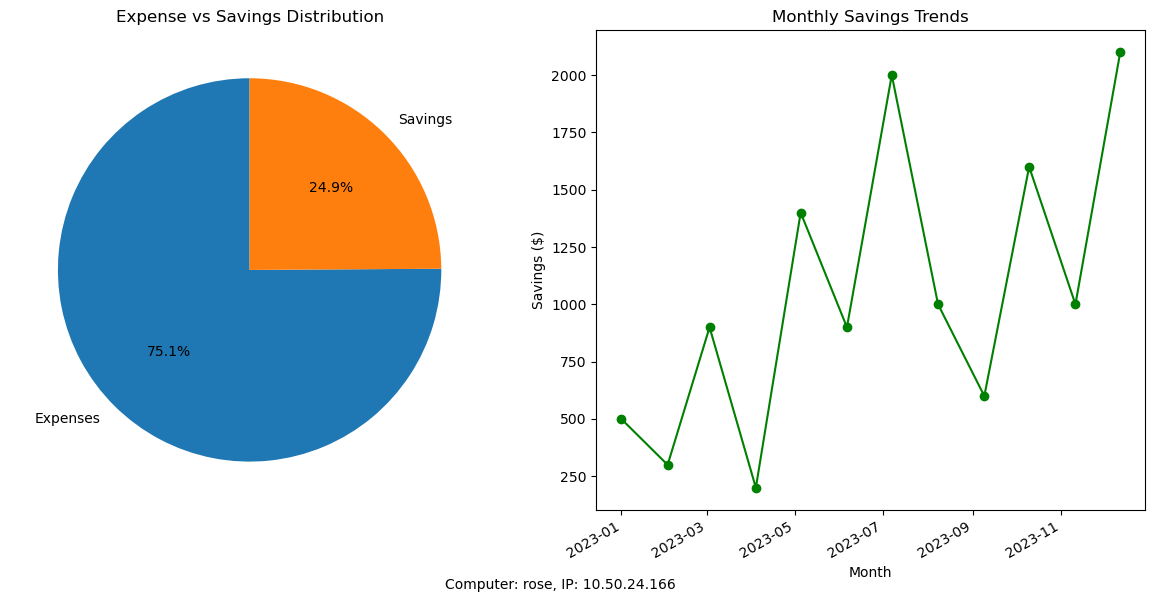

In [2]:
income_df = pd.read_excel('a1.xlsx')
expenses_df = pd.read_csv('a1.txt', sep=' ')
income_df['Month'] = pd.to_datetime(income_df['Month'].str.strip(), format='%Y-%m-%d', errors='coerce')
expenses_df['Month'] = pd.to_datetime(expenses_df['Month'].str.strip(), format='%Y-%m-%d', errors='coerce')
if income_df['Month'].isna().any():
    print("Warning: Invalid dates found in income data.")
if expenses_df['Month'].isna().any():
    print("Warning: Invalid dates found in expenses data.")
merged_df = pd.merge(income_df, expenses_df, on='Month', how='inner')
merged_df['Savings'] = merged_df['Income'] - merged_df['Expenses']
if merged_df['Income'].sum() <= 0:
    raise ValueError("Total income must be greater than zero.")
if merged_df['Expenses'].sum() > merged_df['Income'].sum():
    raise ValueError("Total expenses cannot exceed total income.")
expense_percentage = merged_df['Expenses'].sum() / merged_df['Income'].sum() * 100
labels = ['Expenses', 'Savings']
sizes = [max(0, expense_percentage), max(0, 100 - expense_percentage)]
conn = sqlite3.connect('finance_data.db')
merged_df.to_sql('FinanceData', conn, if_exists='replace', index=False)
query = """
SELECT Month, Income, Expenses, Savings
FROM FinanceData
WHERE Income > 5000 AND Savings > 400
ORDER BY Month ASC;
"""

filtered_df = pd.read_sql_query(query, conn)

print(filtered_df)
conn.close()
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Expense vs Savings Distribution')
plt.subplot(1, 2, 2)
merged_df.sort_values('Month', inplace=True)
merged_df.set_index('Month')['Savings'].plot(kind='line', marker='o', color='green')
plt.title('Monthly Savings Trends')
plt.xlabel('Month')
plt.ylabel('Savings ($)')

hostname = socket.gethostname()
ip_address = socket.gethostbyname(hostname)
plt.figtext(0.5, 0.01, f'Computer: {hostname}, IP: {ip_address}', ha='center', fontsize=10)
 
plt.tight_layout()

plt.show()